## R implementation of a Beta regression to work with the proportional palm swamp/hardwood swamp data

In [1]:
library("betareg")
library("emmeans")
library("ggplot2")
library("lmtest")
library("sandwich")

Warning message:
“package ‘lmtest’ was built under R version 3.6.3”
Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Warning message:
“package ‘sandwich’ was built under R version 3.6.3”


# New tests

### The final model - use this

In [12]:
# 70% swamp composition
# % PS expressed as fractional value between 0 and 1
# output from R_mixed_effects_analysis.ipynb
#data = read.csv('df_bs_all2.csv')

# output dfs from Paper1_betaregression1.ipynb
data_all = read.csv('../data_all.csv')
data_train = read.csv('../data_train.csv')
data_test = read.csv('../data_test.csv')

# not the z-score standardised version
#data_all = read.csv('data_all_noZ.csv')
#data_train = read.csv('data_train_noZ.csv')
#data_test = read.csv('data_test_noZ.csv')

In [13]:
data_all

X,index,PS,elevation,R_diff2,R_diff1,DJF,lat_cat,Tdiff_MAM_JJA,Tdiff_SON_DJF,⋯,basin_name_basin_13,basin_name_basin_2,basin_name_basin_3,basin_name_basin_4,basin_name_basin_5,basin_name_basin_6,basin_name_basin_7,basin_name_basin_8,basin_name_basin_9,basin_name
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
0,0,0.000040,0.2621528200,1.205031,-0.9915730,-1.576223,1.324317,-1.0555936,1.253063,⋯,0,0,0,0,0,0,0,0,0,basin_1
1,1,0.000042,0.3009045700,1.522440,-1.3325346,-1.760055,1.531507,-1.6678155,1.765146,⋯,0,0,0,0,0,0,0,0,0,basin_1
2,2,0.000046,0.4003218700,1.565022,-1.3959605,-1.745057,1.561106,-1.8722317,2.045459,⋯,0,0,0,0,0,0,0,0,0,basin_1
3,3,0.000081,0.2393873600,1.498861,-1.3134684,-1.721226,1.472310,-1.5969958,1.680557,⋯,0,0,0,0,0,0,0,0,0,basin_1
4,4,0.000119,0.0991225400,1.250745,-1.0953845,-1.541682,1.324317,-1.0329720,1.168278,⋯,0,0,0,0,0,0,0,0,0,basin_1
5,5,0.000161,0.2916355400,1.306073,-1.1103724,-1.662263,1.413113,-1.1229222,1.389759,⋯,0,0,0,0,0,0,0,0,0,basin_1
6,6,0.000171,0.2113148600,1.543767,-1.3543642,-1.753474,1.561106,-1.7869392,1.929089,⋯,0,0,0,0,0,0,0,0,0,basin_1
7,7,0.000363,0.3529915500,1.377002,-1.2312112,-1.694878,1.472310,-1.1495263,1.467802,⋯,0,0,0,0,0,0,0,0,0,basin_1
8,8,0.000441,0.4807076800,1.550892,-1.3396560,-1.822322,1.649902,-1.5014750,1.504522,⋯,0,0,0,0,0,0,0,0,0,basin_1


In [30]:
# excluding 3,4,7,8 (DRC side) - zscore
# basin 9 peat is more on DRC side, but included here anyway
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_test_sub = data_test[data_test$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_all_sub = data_all[data_all$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]

m_train <- betareg(PS ~ elevation + elevation_std + Dry_diff + DJF +Total_wet_season + DJF_Tmax + SON_Tmax + 1|basin_name, data = data_train_sub) 

summary(m_train)
coeftest(m_train, vcov = sandwich)

# Using the model to create predictions for each of the test, train and full datasets
data_all_sub$Prediction <- predict(m_train, data_all_sub)
#data_all[c('PS','Prediction')]

data_train_sub$Prediction <- predict(m_train, data_train_sub)
#data_train[c('PS','Prediction')]

data_test_sub$Prediction <- predict(m_train, data_test_sub)

## Saving the outputs to csv for further analysis within python
write.csv(data_all_sub,"data_all_predict.csv", row.names = FALSE)
write.csv(data_train_sub,"data_train_predict.csv", row.names = FALSE)
write.csv(data_test_sub,"data_test_predict.csv", row.names = FALSE)


Call:
betareg(formula = PS ~ elevation + elevation_std + Dry_diff + DJF + Total_wet_season + 
    DJF_Tmax + SON_Tmax + 1 | basin_name, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.2347 -0.5881 -0.0616  0.4624  4.4989 

Coefficients (mean model with logit link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.83211    0.18974 -14.926  < 2e-16 ***
elevation        -4.63946    0.18056 -25.695  < 2e-16 ***
elevation_std    -0.29897    0.14147  -2.113  0.03457 *  
Dry_diff          3.23057    0.23879  13.529  < 2e-16 ***
DJF               0.67297    0.27366   2.459  0.01393 *  
Total_wet_season  0.72632    0.08149   8.913  < 2e-16 ***
DJF_Tmax         -1.28451    0.11904 -10.790  < 2e-16 ***
SON_Tmax         -0.35339    0.11150  -3.169  0.00153 ** 

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.70110    0.09166  18.55


z test of coefficients:

                          Estimate Std. Error  z value  Pr(>|z|)    
(Intercept)              -2.832110   0.182904 -15.4842 < 2.2e-16 ***
elevation                -4.639456   0.160597 -28.8888 < 2.2e-16 ***
elevation_std            -0.298973   0.140253  -2.1317  0.033034 *  
Dry_diff                  3.230571   0.227353  14.2095 < 2.2e-16 ***
DJF                       0.672975   0.275526   2.4425  0.014586 *  
Total_wet_season          0.726320   0.082802   8.7717 < 2.2e-16 ***
DJF_Tmax                 -1.284508   0.103973 -12.3542 < 2.2e-16 ***
SON_Tmax                 -0.353391   0.112227  -3.1489  0.001639 ** 
(phi)_(Intercept)         1.701097   0.103000  16.5156 < 2.2e-16 ***
(phi)_basin_namebasin_10  0.115342   0.243004   0.4747  0.635036    
(phi)_basin_namebasin_11  0.138843   0.180795   0.7680  0.442510    
(phi)_basin_namebasin_12 -0.142299   0.190708  -0.7462  0.455570    
(phi)_basin_namebasin_13 -0.012723   0.121217  -0.1050  0.916408    
(phi)_ba

In [9]:
# excluding 3,4,7,8 (DRC side) - non zscore
# basin 9 peat is more on DRC side, but included here anyway
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_test_sub = data_test[data_test$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_all_sub = data_all[data_all$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]

m_train <- betareg(PS ~ elevation + elevation_std + Dry_diff + DJF +Total_wet_season + DJF_Tmax + SON_Tmax + 1|basin_name, data = data_train_sub) 

summary(m_train)
coeftest(m_train, vcov = sandwich)


Call:
betareg(formula = PS ~ elevation + elevation_std + Dry_diff + DJF + Total_wet_season + 
    DJF_Tmax + SON_Tmax + 1 | basin_name, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.2347 -0.5881 -0.0616  0.4624  4.4989 

Coefficients (mean model with logit link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      205.306904  15.284440  13.432  < 2e-16 ***
elevation         -0.247563   0.009635 -25.695  < 2e-16 ***
elevation_std     -0.047050   0.022263  -2.113  0.03457 *  
Dry_diff           0.014601   0.001079  13.529  < 2e-16 ***
DJF                0.006692   0.002721   2.459  0.01393 *  
Total_wet_season   0.013363   0.001499   8.913  < 2e-16 ***
DJF_Tmax          -3.152762   0.292180 -10.790  < 2e-16 ***
SON_Tmax          -1.531507   0.483204  -3.169  0.00153 ** 

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.70110


z test of coefficients:

                            Estimate  Std. Error  z value  Pr(>|z|)    
(Intercept)              205.3069044  16.3245072  12.5766 < 2.2e-16 ***
elevation                 -0.2475632   0.0085695 -28.8888 < 2.2e-16 ***
elevation_std             -0.0470500   0.0220720  -2.1317  0.033034 *  
Dry_diff                   0.0146008   0.0010275  14.2095 < 2.2e-16 ***
DJF                        0.0066924   0.0027400   2.4425  0.014586 *  
Total_wet_season           0.0133626   0.0015234   8.7717 < 2.2e-16 ***
DJF_Tmax                  -3.1527621   0.2551977 -12.3542 < 2.2e-16 ***
SON_Tmax                  -1.5315068   0.4863655  -3.1489  0.001639 ** 
(phi)_(Intercept)          1.7010966   0.1029995  16.5156 < 2.2e-16 ***
(phi)_basin_namebasin_10   0.1153412   0.2430036   0.4746  0.635038    
(phi)_basin_namebasin_11   0.1388437   0.1807949   0.7680  0.442509    
(phi)_basin_namebasin_12  -0.1422987   0.1907080  -0.7462  0.455571    
(phi)_basin_namebasin_13  -0.0127231  

In [7]:
# rainfall only 
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_test_sub = data_test[data_test$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_all_sub = data_all[data_all$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]

m_train <- betareg(PS ~ Dry_diff + DJF +Total_wet_season + 1|basin_name, data = data_train_sub) 
summary(m_train)


Call:
betareg(formula = PS ~ Dry_diff + DJF + Total_wet_season + 1 | basin_name, 
    data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.8306 -0.5637  0.0221  0.5803  3.8504 

Coefficients (mean model with logit link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       1.03379    0.08233  12.557   <2e-16 ***
Dry_diff          2.59217    0.26409   9.815   <2e-16 ***
DJF               4.28120    0.26398  16.218   <2e-16 ***
Total_wet_season -0.17995    0.07315  -2.460   0.0139 *  

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.94428    0.08899  10.611  < 2e-16 ***
basin_namebasin_10  0.81748    0.52184   1.567  0.11722    
basin_namebasin_11  0.15833    0.13484   1.174  0.24029    
basin_namebasin_12  0.21641    0.14650   1.477  0.13963    
basin_namebasin_13  0.08062    0.11680   0.690  0.49001    
basin_namebasin_2  -0.44318

In [25]:
# temperature only 
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_test_sub = data_test[data_test$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_all_sub = data_all[data_all$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]

m_train <- betareg(PS ~ DJF_Tmax + SON_Tmax + 1|basin_name, data = data_train_sub) 
summary(m_train)


Call:
betareg(formula = PS ~ DJF_Tmax + SON_Tmax + 1 | basin_name, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.1177 -0.5402  0.0303  0.5825  3.4912 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.07720    0.05342   1.445    0.148    
DJF_Tmax    -0.69056    0.04897 -14.103   <2e-16 ***
SON_Tmax     1.07173    0.09550  11.223   <2e-16 ***

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.46768    0.08206   5.699 1.20e-08 ***
basin_namebasin_10  0.68829    0.50220   1.371 0.170512    
basin_namebasin_11  0.54165    0.13101   4.135 3.56e-05 ***
basin_namebasin_12  0.49952    0.14074   3.549 0.000387 ***
basin_namebasin_13  0.23831    0.11355   2.099 0.035838 *  
basin_namebasin_2  -0.17699    0.13777  -1.285 0.198883    
basin_namebasin_5   0.36115    0.49218   0.734 0.463083    
basi

In [29]:
# tests
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_test_sub = data_test[data_test$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_all_sub = data_all[data_all$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]

m_train <- betareg(PS ~ DJF + 1|basin_name, data = data_train_sub) 
summary(m_train)


Call:
betareg(formula = PS ~ DJF + 1 | basin_name, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.0148 -0.5586  0.0263  0.5972  3.6299 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.27465    0.05696   4.821 1.42e-06 ***
DJF          1.29974    0.05950  21.843  < 2e-16 ***

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.78542    0.08798   8.927   <2e-16 ***
basin_namebasin_10  0.84810    0.52053   1.629    0.103    
basin_namebasin_11  0.04928    0.13229   0.373    0.710    
basin_namebasin_12  0.17513    0.14448   1.212    0.225    
basin_namebasin_13 -0.04579    0.11309  -0.405    0.686    
basin_namebasin_2  -0.32345    0.13786  -2.346    0.019 *  
basin_namebasin_5   0.32672    0.50423   0.648    0.517    
basin_namebasin_6  -0.40138    0.36631  -1.096    0.273    
basin_namebas

In [25]:
data_train_sub = data_train[data_train$basin_name %in% c('basin_3','basin_4','basin_7','basin_8'),]
#m_train <- betareg(PS ~ elevation + elevation_var + HAND + DJF + Dry_diff + DJF_Tmax  + SON + Wet_diff + SON_Tmax + 1|basin_name, data = data_train_sub) 
#m_train <- betareg(PS ~ elevation  + elevation_std + Dry_diff + DJF + DJF_Tmax + Total_wet_season + SON_Tmax + 1|basin_name, data = data_train_sub) 
m_train <- betareg(PS ~ DJF + 1|basin_name, data = data_train_sub) 

summary(m_train)

Warning message in betareg.fit(X, Y, Z, weights, offset, link, link.phi, type, control):
“no valid starting value for precision parameter found, using 1 instead”



Call:
betareg(formula = PS ~ DJF + 1 | basin_name, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.2412 -0.5187  0.1226  0.5336  3.6219 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.32844    0.06569   -5.00 5.73e-07 ***
DJF          0.93735    0.07326   12.79  < 2e-16 ***

Phi coefficients (precision model with log link):
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.2805     0.1320   2.126  0.03353 *  
basin_namebasin_4  -0.2893     0.1487  -1.946  0.05169 .  
basin_namebasin_7   0.6725     0.2214   3.037  0.00239 ** 
basin_namebasin_8   0.7502     0.1498   5.009 5.47e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood: 166.5 on 6 Df
Pseudo R-squared: 0.1709
Number of iterations: 13 (BFGS) + 1 (Fisher scoring) 

In [109]:
# original version but with 80:20 split for each basin, rather than across the whole dataset

#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13'),]
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]

#data_train_sub=data_train
m_train <- betareg(PS ~ elevation + DJF + Dry_diff + SON + Wet_diff + 1|basin_name, data = data_train_sub)
#m_train <- betareg(PS ~ elevation + elevation_var + HAND + water_composition + Dry_diff + Total_dry_season 
#                   + Total_wet_season + Wet_diff + JJA_Tmax + SON_Tmax + 1|basin_name, data = data_train_sub)

#m_train <- betareg(PS ~ elevation + elevation_var  + Dry_diff 
#                   + Total_wet_season + Wet_diff + JJA_Tmax + SON_Tmax + 1|basin_name, data = data_train_sub)

#m_train <- betareg(PS ~ elevation + elevation_var  + Total_dry_season 
#                   + Total_wet_season + DJF_Tmax + SON_Tmax + HAND + 1|basin_name, data = data_train_sub)

#m_train <- betareg(PS ~ elevation + elevation_var  + Total_dry_season 
#                   + DJF + JJA_Tmax + Total_wet_season + SON_Tmax + 1|basin_name, data = data_train_sub)
#m_train <- betareg(PS ~ DJF + 1|basin_name, data = data_train_sub)
#'elevation', 'elevation_var', 'HAND','DJF','MAM','JJA','JJA_Tmax','SON','SON_Tmax'
m_train <- betareg(PS ~ R_diff2 + DJF + JJA + SON + JJA_Tmax + SON_Tmax + elevation + elevation_var + HAND+ 1|basin_name, data = data_train_sub) 
#'elevation', 'elevation_var','DJF','SON','SON_Tmax','MAM','JJA','JJA_Tmax'
m_train <- betareg(PS ~ elevation + elevation_var + DJF + MAM + JJA + SON + SON_Tmax  + 1|basin_name, data = data_train_sub) 
m_train <- betareg(PS ~ elevation + elevation_var + HAND + DJF + MAM + JJA + SON + SON_Tmax  + 1|basin_name, data = data_train_sub) 
m_train <- betareg(PS ~ elevation + elevation_var + HAND + Total_dry_season + Dry_diff + Wet_diff + SON + SON_Tmax  + 1|basin_name, data = data_train_sub) 

#nrow(data_train_sub)
#nrow(data_train)
#nrow(data_all)
summary(m_train)

# predictions


Call:
betareg(formula = PS ~ elevation + elevation_var + HAND + Total_dry_season + 
    Dry_diff + Wet_diff + SON + SON_Tmax + 1 | basin_name, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.2906 -0.6489 -0.0636  0.4434  4.5460 

Coefficients (mean model with logit link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.62778    0.13613 -11.958  < 2e-16 ***
elevation        -3.42344    0.14227 -24.063  < 2e-16 ***
elevation_var     0.86017    0.26368   3.262 0.001105 ** 
HAND             -0.16400    0.09737  -1.684 0.092105 .  
Total_dry_season  0.60372    0.09523   6.340 2.30e-10 ***
Dry_diff          0.49912    0.13176   3.788 0.000152 ***
Wet_diff          0.25766    0.06494   3.968 7.26e-05 ***
SON               0.22583    0.07832   2.884 0.003932 ** 
SON_Tmax         -0.53258    0.09133  -5.831 5.49e-09 ***

Phi coefficients (precision model with log link):
                   Estimate Std. Error z

In [103]:
#final version
# excluding 3,4,7,8 (DRC)
data_train_sub = data_train[data_train$basin_name %in% c('basin_7','basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_test_sub = data_test[data_test$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]
data_all_sub = data_all[data_all$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]

# model 1: best results so far
m_train <- betareg(PS ~ elevation + Dry_diff + DJF + DJF_Tmax + Total_wet_season + SON_Tmax + 1|basin_name, data = data_train_sub)

# model 2
#m_train <- betareg(PS ~ elevation + elevation_std + Dry_diff + Wet_diff + Annual_rainfall + DJF_Tmax + SON_Tmax + 1|basin_name, data = data_train_sub)

# model 3

summary(m_train)
coeftest(m_train, vcov = sandwich)


Call:
betareg(formula = PS ~ elevation + Dry_diff + DJF + DJF_Tmax + Total_wet_season + 
    SON_Tmax + 1 | basin_name, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.6517 -0.6208 -0.0541  0.5112  5.0404 

Coefficients (mean model with logit link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.47257    0.07674 -19.190  < 2e-16 ***
elevation        -2.77820    0.09715 -28.598  < 2e-16 ***
Dry_diff          2.18028    0.15230  14.315  < 2e-16 ***
DJF               1.17190    0.13425   8.729  < 2e-16 ***
DJF_Tmax         -0.74421    0.09192  -8.096 5.68e-16 ***
Total_wet_season  0.24997    0.05532   4.518 6.23e-06 ***
SON_Tmax         -0.16754    0.08402  -1.994   0.0461 *  

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.40063    0.07479  18.729  < 2e-16 ***
basin_namebasin_10  0.05215    0.37390   0.139 0.889081    


z test of coefficients:

                          Estimate Std. Error  z value  Pr(>|z|)    
(Intercept)              -1.472572   0.079696 -18.4773 < 2.2e-16 ***
elevation                -2.778202   0.101594 -27.3461 < 2.2e-16 ***
Dry_diff                  2.180283   0.152796  14.2693 < 2.2e-16 ***
DJF                       1.171899   0.142600   8.2181 < 2.2e-16 ***
DJF_Tmax                 -0.744208   0.083099  -8.9556 < 2.2e-16 ***
Total_wet_season          0.249967   0.061801   4.0447 5.238e-05 ***
SON_Tmax                 -0.167539   0.089945  -1.8627  0.062508 .  
(phi)_(Intercept)         1.400629   0.077151  18.1543 < 2.2e-16 ***
(phi)_basin_namebasin_10  0.052147   0.282880   0.1843  0.853744    
(phi)_basin_namebasin_11  0.388284   0.146070   2.6582  0.007856 ** 
(phi)_basin_namebasin_12  0.174060   0.172525   1.0089  0.313024    
(phi)_basin_namebasin_13 -0.016339   0.099506  -0.1642  0.869570    
(phi)_basin_namebasin_2  -0.205794   0.104211  -1.9748  0.048294 *  
(phi)_ba

In [103]:
nrow(data_all)

[1] 1793

In [104]:
# testing the predictions
# predicting % palm swamp for the full, train and test datasets 
# Saving these new dataframes to csv for plotting within python

#p_train = predict(m_train,newdata = data_train)
#data.frame(test)

data_all_sub$Prediction <- predict(m_train, data_all_sub)
#data_all[c('PS','Prediction')]

data_train_sub$Prediction <- predict(m_train, data_train_sub)
#data_train[c('PS','Prediction')]

data_test_sub$Prediction <- predict(m_train, data_test_sub)
#data_test[c('PS','Prediction')]
## Saving the outputs to csv for further analysis within python
write.csv(data_all_sub,"data_all_predict.csv", row.names = FALSE)
write.csv(data_train_sub,"data_train_predict.csv", row.names = FALSE)
write.csv(data_test_sub,"data_test_predict.csv", row.names = FALSE)

## Saving the outputs to csv for further analysis within python
#write.csv(data_all,"data_all_predict_noZ.csv", row.names = FALSE)
#write.csv(data_train,"data_train_predict_noZ.csv", row.names = FALSE)
#write.csv(data_test,"data_test_predict_noZ.csv", row.names = FALSE)

In [60]:
# new version - ALL BASINS
# exclude basins 3,4,8? relationship seems to fail when these are included

# 1. all sub-basins
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10','basin_3','basin_4','basin_8'),]

# 2. excluding 3,4,7,8 (DRC)
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]

# 3. excluding 3,4,8 (DRC with no relation to dry season rainfall)
#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10'),]

# 4. only DRC basins 3 to 8 + mixed
#data_train_sub = data_train[data_train$basin_name %in% c('basin_3','basin_4','basin_5','basin_6','basin_7','basin_8','basin_9','basin_10'),]

# 5. RoC, mixed and DRC 1 only
#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_9','basin_10'),]

# 6. RoC, and DRC 1 only
#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13'),]

# 7. only DRC basins 2,3,6,7 
#data_train_sub = data_train[data_train$basin_name %in% c('basin_3','basin_4','basin_7','basin_8'),]

m_train <- betareg(PS ~ elevation + Dry_diff + DJF + elevation_var + DJF_Tmax + Total_wet_season + SON_Tmax  + 1|basin_name, data = data_train_sub)
#m_train <- betareg(PS ~ elevation + Dry_diff + DJF + SON + Wet_diff  + 1|basin_name, data = data_train_sub)
m_train <- betareg(PS ~ elevation + elevation_var + HAND + water_composition + Dry_diff + DJF + SON + Wet_diff + SON_Tmax  + DJF_Tmax  + 1|basin_name, data = data_train_sub)
m_train <- betareg(PS ~ elevation + elevation_std + Dry_diff + Wet_diff + Annual_rainfall + DJF_Tmax + SON_Tmax + 1|basin_name, data = data_train_sub)

# without elevation
#m_train <- betareg(PS ~ + DJF + Dry_diff + Tdiff_SON_DJF + 1|basin_name, data = data_train_sub)

summary(m_train)
coeftest(m_train, vcov = sandwich)




Call:
betareg(formula = PS ~ elevation + elevation_std + Dry_diff + Wet_diff + 
    Annual_rainfall + DJF_Tmax + SON_Tmax + 1 | basin_name, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.7044 -0.5906 -0.0808  0.4938  4.4630 

Coefficients (mean model with logit link):
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.41122    0.14406 -16.737  < 2e-16 ***
elevation       -4.20938    0.15130 -27.822  < 2e-16 ***
elevation_std   -0.33189    0.14441  -2.298 0.021544 *  
Dry_diff         1.57505    0.12745  12.358  < 2e-16 ***
Wet_diff         0.25194    0.06958   3.621 0.000294 ***
Annual_rainfall  0.89941    0.10554   8.522  < 2e-16 ***
DJF_Tmax        -0.82932    0.09846  -8.423  < 2e-16 ***
SON_Tmax        -0.52241    0.10476  -4.987 6.13e-07 ***

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.74592    0.09319  18.736   <


z test of coefficients:

                          Estimate Std. Error  z value  Pr(>|z|)    
(Intercept)              -2.411223   0.123951 -19.4531 < 2.2e-16 ***
elevation                -4.209380   0.147746 -28.4907 < 2.2e-16 ***
elevation_std            -0.331893   0.137886  -2.4070   0.01608 *  
Dry_diff                  1.575050   0.118522  13.2891 < 2.2e-16 ***
Wet_diff                  0.251942   0.062117   4.0559 4.994e-05 ***
Annual_rainfall           0.899406   0.093188   9.6515 < 2.2e-16 ***
DJF_Tmax                 -0.829324   0.086970  -9.5358 < 2.2e-16 ***
SON_Tmax                 -0.522410   0.098647  -5.2957 1.185e-07 ***
(phi)_(Intercept)         1.745922   0.112578  15.5086 < 2.2e-16 ***
(phi)_basin_namebasin_10  0.146769   0.275747   0.5323   0.59455    
(phi)_basin_namebasin_11  0.194590   0.203553   0.9560   0.33909    
(phi)_basin_namebasin_12 -0.221820   0.194234  -1.1420   0.25345    
(phi)_basin_namebasin_13 -0.039708   0.128097  -0.3100   0.75657    
(phi)_ba

In [104]:
# 1. all sub-basins
#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10','basin_3','basin_4','basin_8'),]

# 2. excluding 3,4,7,8 (DRC)
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_9','basin_10'),]

# 3. excluding 3,4,8 (DRC with no relation to dry season rainfall)
#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10'),]

# 4. only DRC basins 3 to 8 + mixed
#data_train_sub = data_train[data_train$basin_name %in% c('basin_3','basin_4','basin_5','basin_6','basin_7','basin_8','basin_9','basin_10'),]

# 5. RoC, mixed and DRC 1 only
#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_9','basin_10'),]

# 6. RoC, and DRC 1 only
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13'),]


m_train <- betareg(PS ~ elevation  + DJF + Dry_diff
                   + SON + SON_Tmax + Tdiff_JJA_SON + Tdiff_DJF_MAM + 1|basin_name, data = data_train_sub)
#m_train <- betareg(PS ~ elevation_var  + Dry_ratio + Total_dry_season
#                   + Total_wet_season + Wet_ratio + 1|basin_name, data = data_train_sub)

summary(m_train)


Call:
betareg(formula = PS ~ elevation + DJF + Dry_diff + SON + SON_Tmax + 
    Tdiff_JJA_SON + Tdiff_DJF_MAM + 1 | basin_name, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.5177 -0.6618 -0.0892  0.4524  4.4091 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.29147    0.16176 -14.166  < 2e-16 ***
elevation     -4.34233    0.18137 -23.942  < 2e-16 ***
DJF            1.91255    0.28797   6.641 3.11e-11 ***
Dry_diff       3.10965    0.30650  10.146  < 2e-16 ***
SON            0.71622    0.08950   8.002 1.22e-15 ***
SON_Tmax      -0.71397    0.11872  -6.014 1.81e-09 ***
Tdiff_JJA_SON  0.46450    0.07685   6.044 1.50e-09 ***
Tdiff_DJF_MAM  0.23968    0.06618   3.622 0.000293 ***

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.79540    0.09367  19.168  < 2e-16 ***
basin_namebasin_11  

In [56]:
# new version - ALL BASINS
# output dfs from Paper1_betaregression1.ipynb
data_all = read.csv('data_all.csv')
data_train = read.csv('data_train.csv')
data_test = read.csv('data_test.csv')
# Beta regression model, including elevation
# exclude basins 3,4,8? relationship seems to fail when these are included
#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10','basin_3','basin_4','basin_8'),]
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10'),]
#data_train_sub = data_train[data_train$basin_name %in% c('basin_5','basin_6','basin_7','basin_9','basin_10'),]
data_train_sub = data_train[data_train$basin_name %in% c('basin_1'),]


#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_9','basin_10'),]

#data_train_sub = subset(data_train_sub, elevation_std < 3.0)
# r2 = 0.7437

m_train <- betareg(PS ~ elevation + Dry_diff + DJF + elevation_var + DJF_Tmax + Total_wet_season + SON_Tmax, data = data_train_sub)

# without elevation
#m_train <- betareg(PS ~ + DJF + Dry_diff + Tdiff_SON_DJF + 1|basin_name, data = data_train_sub)

summary(m_train)


Call:
betareg(formula = PS ~ elevation + Dry_diff + DJF + elevation_var + DJF_Tmax + 
    Total_wet_season + SON_Tmax, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.8459 -0.6030 -0.0118  0.5298  3.7829 

Coefficients (mean model with logit link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -6.7346     0.9767  -6.895 5.38e-12 ***
elevation         -7.8831     0.4252 -18.539  < 2e-16 ***
Dry_diff           3.7543     0.6865   5.469 4.53e-08 ***
DJF                1.3288     0.7999   1.661   0.0967 .  
elevation_var     -2.8643     2.0783  -1.378   0.1681    
DJF_Tmax           0.3728     0.3546   1.051   0.2931    
Total_wet_season   0.4533     0.2217   2.045   0.0408 *  
SON_Tmax          -1.3937     0.2706  -5.151 2.59e-07 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)   9.4877     0.9923   9.562   <2e-16 ***
---
Signif. codes:  0 '

In [57]:
data_train_sub

,X,index,PS,elevation,R_diff2,R_diff1,DJF,Tdiff_MAM_JJA,Tdiff_SON_DJF,MAM_Tmax,⋯,basin_name_basin_13,basin_name_basin_2,basin_name_basin_3,basin_name_basin_4,basin_name_basin_5,basin_name_basin_6,basin_name_basin_7,basin_name_basin_8,basin_name_basin_9,basin_name
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
3,2,192,0.626363,-0.4043831500,1.39161784,-1.36260202,-1.61586415,-1.1274409,1.23222084,1.50725756,⋯,0,0,0,0,0,0,0,0,0,basin_1
23,22,133,0.222293,-0.3509918200,1.06484637,-0.82369504,-1.12320072,-0.9327935,1.02920667,1.51391512,⋯,0,0,0,0,0,0,0,0,0,basin_1
24,23,202,0.692142,-0.2856315400,1.24011948,-1.04438881,-1.47543288,-1.0510869,1.18138379,1.34617292,⋯,0,0,0,0,0,0,0,0,0,basin_1
26,25,198,0.666950,-0.8981378000,0.01526177,-0.19744727,-0.03386074,-0.2910923,-0.03941792,0.03654769,⋯,0,0,0,0,0,0,0,0,0,basin_1
32,31,142,0.269981,-0.0151916250,1.50663743,-1.33062791,-1.73800907,-1.1679265,1.42725828,1.20045750,⋯,0,0,0,0,0,0,0,0,0,basin_1
39,38,170,0.442928,-0.0783177200,1.53894909,-1.32050270,-1.74695604,-1.1758071,1.44761932,1.14949336,⋯,0,0,0,0,0,0,0,0,0,basin_1
46,45,22,0.001588,0.0530623940,1.18091671,-0.90880674,-1.43913683,-0.9479611,1.08924636,1.20208079,⋯,0,0,0,0,0,0,0,0,0,basin_1
48,47,45,0.006604,0.2075287600,1.64985661,-1.44873762,-1.87590995,-1.9439805,2.06231410,2.10697641,⋯,0,0,0,0,0,0,0,0,0,basin_1
51,50,61,0.031110,0.1103587100,1.42976303,-1.35477652,-1.65953403,-1.3318759,1.46441914,1.71144608,⋯,0,0,0,0,0,0,0,0,0,basin_1


In [72]:
# new version - ALL BASINS
# output dfs from Paper1_betaregression1.ipynb
data_all = read.csv('data_all.csv')
data_train = read.csv('data_train.csv')
data_test = read.csv('data_test.csv')
# Beta regression model, including elevation
# exclude basins 3,4,8? relationship seems to fail when these are included
#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10','basin_3','basin_4','basin_8'),]
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10'),]
#data_train_sub = data_train[data_train$basin_name %in% c('basin_5','basin_6','basin_7','basin_9','basin_10'),]
#data_train_sub = data_train[data_train$basin_name %in% c('basin_3','basin_4','basin_8'),]


#data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13'),]


m_train <- betareg(PS ~ elevation + Dry_diff + DJF + elevation_var + DJF_Tmax + Total_wet_season + SON_Tmax  + 1|basin_name, data = data_train_sub)

summary(m_train)


Call:
betareg(formula = PS ~ elevation + Dry_diff + DJF + elevation_var + DJF_Tmax + 
    Total_wet_season + SON_Tmax + 1 | basin_name, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.7296 -0.5854 -0.0910  0.4577  4.4772 

Coefficients (mean model with logit link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.5524     0.1640  -9.467  < 2e-16 ***
elevation         -3.9159     0.1524 -25.702  < 2e-16 ***
Dry_diff           2.8571     0.2125  13.446  < 2e-16 ***
DJF                1.3474     0.1939   6.948 3.71e-12 ***
elevation_var      1.0510     0.4312   2.438  0.01478 *  
DJF_Tmax          -0.8870     0.1112  -7.979 1.47e-15 ***
Total_wet_season   0.4371     0.0719   6.079 1.21e-09 ***
SON_Tmax          -0.3346     0.1026  -3.260  0.00112 ** 

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.65543    0.09240  17.91

In [73]:
# new version - ALL BASINS
# output dfs from Paper1_betaregression1.ipynb
data_all = read.csv('data_all.csv')
data_train = read.csv('data_train.csv')
data_test = read.csv('data_test.csv')
# Beta regression model, including elevation
# exclude basins 3,4,8? relationship seems to fail when these are included
data_train_sub = data_train[data_train$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10'),]
data_test_sub = data_test[data_test$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10'),]
data_all_sub = data_all[data_all$basin_name %in% c('basin_1','basin_2','basin_11','basin_12','basin_13','basin_5','basin_6','basin_7','basin_9','basin_10'),]

m_train <- betareg(PS ~ elevation + Dry_diff + DJF + elevation_var + DJF_Tmax + Total_wet_season + SON_Tmax  + 1|basin_name, data = data_train_sub, type='ML')

summary(m_train)


Call:
betareg(formula = PS ~ elevation + Dry_diff + DJF + elevation_var + DJF_Tmax + 
    Total_wet_season + SON_Tmax + 1 | basin_name, data = data_train_sub, 
    type = "ML")

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.7296 -0.5854 -0.0910  0.4577  4.4772 

Coefficients (mean model with logit link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.5524     0.1640  -9.467  < 2e-16 ***
elevation         -3.9159     0.1524 -25.702  < 2e-16 ***
Dry_diff           2.8571     0.2125  13.446  < 2e-16 ***
DJF                1.3474     0.1939   6.948 3.71e-12 ***
elevation_var      1.0510     0.4312   2.438  0.01478 *  
DJF_Tmax          -0.8870     0.1112  -7.979 1.47e-15 ***
Total_wet_season   0.4371     0.0719   6.079 1.21e-09 ***
SON_Tmax          -0.3346     0.1026  -3.260  0.00112 ** 

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.65543

In [69]:
nrow(data_all_sub)

[1] 1040

In [74]:
# testing the predictions
# predicting % palm swamp for the full, train and test datasets 
# Saving these new dataframes to csv for plotting within python

#p_train = predict(m_train,newdata = data_train)
#data.frame(test)

data_all_sub$Prediction <- predict(m_train, data_all_sub)
#data_all[c('PS','Prediction')]

data_train_sub$Prediction <- predict(m_train, data_train_sub)
#data_train[c('PS','Prediction')]

data_test_sub$Prediction <- predict(m_train, data_test_sub)
#data_test[c('PS','Prediction')]
## Saving the outputs to csv for further analysis within python
write.csv(data_all_sub,"data_all_predict.csv", row.names = FALSE)
write.csv(data_train_sub,"data_train_predict.csv", row.names = FALSE)
write.csv(data_test_sub,"data_test_predict.csv", row.names = FALSE)

## Saving the outputs to csv for further analysis within python
#write.csv(data_all,"data_all_predict_noZ.csv", row.names = FALSE)
#write.csv(data_train,"data_train_predict_noZ.csv", row.names = FALSE)
#write.csv(data_test,"data_test_predict_noZ.csv", row.names = FALSE)

In [246]:
# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_1'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
summary(m_train)

# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_2'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
summary(m_train)

# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_3'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
summary(m_train)

# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_4'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
summary(m_train)

# testing final eq for each basin
#data_train_sub = data_train[data_train$basin_name %in% c('basin_5'),]
#m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
#summary(m_train)

# testing final eq for each basin
#data_train_sub = data_train[data_train$basin_name %in% c('basin_6'),]
#m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
#summary(m_train)


# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_7'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
print("1")
summary(m_train)

# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_8'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
summary(m_train)

# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_9'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
summary(m_train)

# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_10'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
summary(m_train)

# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_11'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
summary(m_train)

# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_12'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
summary(m_train)

# testing final eq for each basin
data_train_sub = data_train[data_train$basin_name %in% c('basin_13'),]
m_train <- betareg(PS ~ elevation + elevation_var + DJF + SON + Dry_diff + Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)
summary(m_train)


Call:
betareg(formula = PS ~ elevation + elevation_var + DJF + SON + Dry_diff + 
    Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.9553 -0.6383  0.0272  0.5363  3.4923 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -7.6381     0.9630  -7.932 2.16e-15 ***
elevation      -8.1052     0.4038 -20.073  < 2e-16 ***
elevation_var  -4.3666     2.0773  -2.102  0.03554 *  
DJF             2.7555     0.8935   3.084  0.00204 ** 
SON             0.7899     0.2800   2.821  0.00479 ** 
Dry_diff        5.4419     0.8307   6.551 5.70e-11 ***
Wet_diff        0.1242     0.1937   0.641  0.52153    
SON_Tmax       -1.6469     0.2761  -5.964 2.46e-09 ***
DJF_Tmax        0.9954     0.3977   2.503  0.01232 *  

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)   10.154      1.035    9.81   <2e-16 *


Call:
betareg(formula = PS ~ elevation + elevation_var + DJF + SON + Dry_diff + 
    Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.7954 -0.6165 -0.0596  0.6909  4.7201 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.3763     0.7721  -4.373 1.22e-05 ***
elevation      -5.4760     0.7125  -7.685 1.53e-14 ***
elevation_var   1.7851     1.2897   1.384  0.16632    
DJF             5.1030     1.8108   2.818  0.00483 ** 
SON             0.1161     0.3836   0.303  0.76204    
Dry_diff        6.4258     0.9154   7.020 2.22e-12 ***
Wet_diff        0.6290     0.3463   1.816  0.06932 .  
SON_Tmax       -1.0328     0.6986  -1.478  0.13930    
DJF_Tmax        1.4056     1.1009   1.277  0.20169    

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)   10.686      1.841   5.804 6.47e-09 *


Call:
betareg(formula = PS ~ elevation + elevation_var + DJF + SON + Dry_diff + 
    Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.1640 -0.5641 -0.0522  0.4445  4.9157 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.1965     1.1586  -2.759  0.00580 ** 
elevation      -8.0949     0.7238 -11.184  < 2e-16 ***
elevation_var  11.6124     2.6934   4.311 1.62e-05 ***
DJF             1.7001     1.5706   1.082  0.27904    
SON             1.9662     0.6160   3.192  0.00141 ** 
Dry_diff        3.4037     1.4818   2.297  0.02162 *  
Wet_diff        0.6423     0.6562   0.979  0.32765    
SON_Tmax       -3.0501     1.3049  -2.337  0.01941 *  
DJF_Tmax        5.5676     1.9500   2.855  0.00430 ** 

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    8.208      1.388   5.912 3.39e-09 *


Call:
betareg(formula = PS ~ elevation + elevation_var + DJF + SON + Dry_diff + 
    Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.4195 -0.5491 -0.0818  0.6179  2.3975 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.72811    0.31623  -5.465 4.63e-08 ***
elevation     -3.61056    0.27090 -13.328  < 2e-16 ***
elevation_var  0.86758    0.66459   1.305 0.191744    
DJF            0.01368    0.57312   0.024 0.980951    
SON           -0.38726    0.18717  -2.069 0.038538 *  
Dry_diff       1.40555    0.44446   3.162 0.001565 ** 
Wet_diff       0.83843    0.17019   4.926 8.37e-07 ***
SON_Tmax       1.14718    0.30036   3.819 0.000134 ***
DJF_Tmax      -1.57183    0.59809  -2.628 0.008586 ** 

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)   7.9987     0.7493   10.68   <2e-16 *

[1] "1"



Call:
betareg(formula = PS ~ elevation + elevation_var + DJF + SON + Dry_diff + 
    Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.9751 -0.7708 -0.0587  0.4987  2.6931 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.5173     0.7080  -0.731  0.46504    
elevation      -2.4175     0.5164  -4.682 2.84e-06 ***
elevation_var   0.3384     1.5697   0.216  0.82929    
DJF             6.0386     2.3736   2.544  0.01096 *  
SON            -1.3756     0.8463  -1.625  0.10409    
Dry_diff        1.6731     1.7200   0.973  0.33069    
Wet_diff        0.4648     0.7365   0.631  0.52798    
SON_Tmax       -2.2198     0.8444  -2.629  0.00857 ** 
DJF_Tmax        4.6766     1.9316   2.421  0.01548 *  

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)   19.060      3.935   4.844 1.27e-06 *


Call:
betareg(formula = PS ~ elevation + elevation_var + DJF + SON + Dry_diff + 
    Wet_diff + SON_Tmax + DJF_Tmax, data = data_train_sub)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.6201 -0.7623 -0.0375  0.5391  7.8713 

Coefficients (mean model with logit link):
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.8732579  0.3559424  -2.453   0.0142 *  
elevation     -3.0468298  0.1739630 -17.514   <2e-16 ***
elevation_var -0.3793178  0.5116025  -0.741   0.4584    
DJF           -1.9764193  1.1566576  -1.709   0.0875 .  
SON           -0.0878269  0.3637752  -0.241   0.8092    
Dry_diff       0.0006916  0.5171294   0.001   0.9989    
Wet_diff       0.0681771  0.2183448   0.312   0.7549    
SON_Tmax       0.8354030  0.3712285   2.250   0.0244 *  
DJF_Tmax      -1.9872459  0.8625481  -2.304   0.0212 *  

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)  11.9674     0.982

Warning message in betareg.fit(X, Y, Z, weights, offset, link, link.phi, type, control):
“no valid starting value for precision parameter found, using 1 instead”
Warning message in sqrt(wpp):
“NaNs produced”


ERROR: Error in while (testhalf & stepFactor < 11) {: missing value where TRUE/FALSE needed


In [58]:
# DRC and mixed basins - dry season rainfall massively significant
data_train_sub = data_train[data_train$basin_name %in% c('basin_7'),]
#m_train <- betareg(PS ~ elevation + DJF + MAM + SON  + DJF_Tmax + MAM_Tmax + 1|basin_name, data = data_train_sub)
m_train <- betareg(PS ~ elevation + elevation_var + DJF + Dry_diff + Total_wet_season + SON_Tmax + DJF_Tmax + 1|basin_name, data = data_train_sub)


summary(m_train)

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [5]:
# ORIGINAL VERSION 
# Beta regression model, including elevation
m_train <- betareg(PS ~ elevation + DJF + Dry_diff + Wet_diff + SON + 1|basin_name, data = data_train)
summary(m_train)



Call:
betareg(formula = PS ~ elevation + DJF + Dry_diff + Wet_diff + SON + 
    1 | basin_name, data = data_train)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.1583 -0.6168 -0.1097  0.5028  4.4910 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 61.099930   3.754525  16.274  < 2e-16 ***
elevation   -0.238407   0.011038 -21.598  < 2e-16 ***
DJF          0.010394   0.002970   3.500 0.000465 ***
Dry_diff     0.012026   0.001216   9.889  < 2e-16 ***
Wet_diff     0.014757   0.003098   4.763 1.90e-06 ***
SON          0.015819   0.002853   5.544 2.95e-08 ***

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.53855    0.09902  15.538  < 2e-16 ***
basin_namebasin_11  0.33296    0.16287   2.044  0.04092 *  
basin_namebasin_12  0.03708    0.16760   0.221  0.82491    
basin_namebasin_13 -0.42456    0.13222  -3.211  0.001

In [104]:
nrow(data_test_sub)

[1] 184

`geom_smooth()` using formula 'y ~ x'



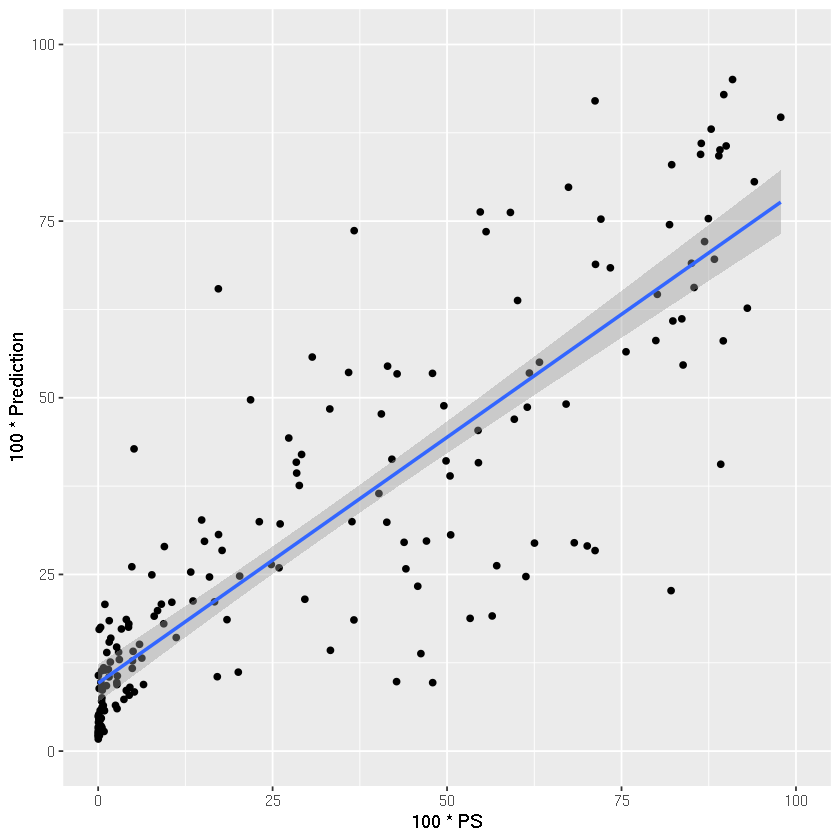

In [103]:
g <- ggplot(data_test_sub, aes(x=100*PS, y=100*Prediction)) + geom_point() + geom_smooth(method="lm")
g1 <- g + coord_cartesian(xlim=(c(0, 100.)), ylim= (c(0, 100)))
plot(g1)

`geom_smooth()` using formula 'y ~ x'



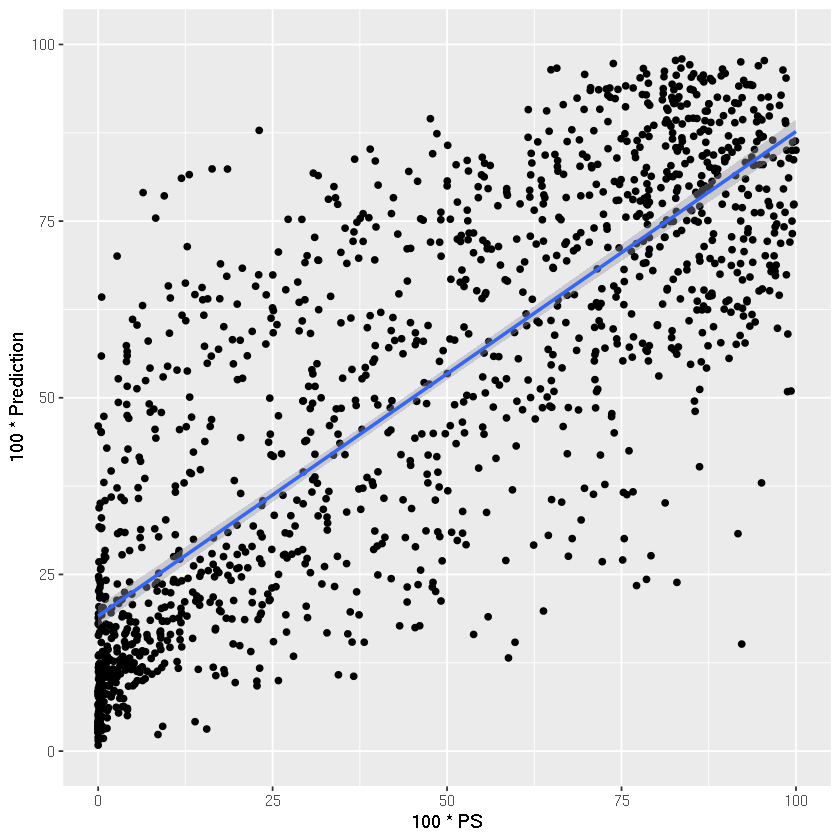

In [92]:
g <- ggplot(data_train, aes(x=100*PS, y=100*Prediction)) + geom_point() + geom_smooth(method="lm")
g1 <- g + coord_cartesian(xlim=(c(0, 100.)), ylim= (c(0, 100)))
plot(g1)

In [45]:
# Beta regression model, without elevation - incorporating SON reduces the z-value of the intercept
m_train2 <- betareg(PS ~ DJF + Dry_diff + Wet_diff + SON + 1|basin_name, data = data_train)
summary(m_train2)


Call:
betareg(formula = PS ~ DJF + Dry_diff + Wet_diff + SON + 1 | basin_name, 
    data = data_train)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.4294 -0.5661  0.0314  0.6081  3.3781 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.08071    0.09912  10.903  < 2e-16 ***
DJF          4.17558    0.31755  13.150  < 2e-16 ***
Dry_diff     2.84554    0.32637   8.719  < 2e-16 ***
Wet_diff     0.41425    0.09597   4.317 1.58e-05 ***
SON         -0.22667    0.11051  -2.051   0.0403 *  

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)          0.8126     0.0965   8.421   <2e-16 ***
basin_namebasin_11   0.3399     0.1582   2.148   0.0317 *  
basin_namebasin_12   0.2480     0.1628   1.524   0.1276    
basin_namebasin_13   0.1436     0.1298   1.106   0.2686    
basin_namebasin_2   -0.3599     0.1481  -2.430   0.0151 *  
---
S

In [8]:
# Same model except for elevation

data_all$Prediction <- predict(m_train2, data_all)
#data_all[c('PS','Prediction')]

data_train$Prediction <- predict(m_train2, data_train)
#data_train[c('PS','Prediction')]

data_test$Prediction <- predict(m_train2, data_test)
#data_test[c('PS','Prediction')]


## Saving the outputs to csv for further analysis within python
write.csv(data_all,"data_all_predict2.csv", row.names = FALSE)
write.csv(data_train,"data_train_predict2.csv", row.names = FALSE)
write.csv(data_test,"data_test_predict2.csv", row.names = FALSE)

#### Other tests

In [9]:
# without elevation
gy_logit <- betareg(PS ~ DJF +  Dry_diff + Wet_diff + 1|basin_name, data = data)
summary(gy_logit)

ERROR: Error in as.data.frame.default(data, optional = TRUE): cannot coerce class ‘"function"’ to a data.frame


In [ ]:
#dev.new(width = 10, height = 20)

# 3 rows, 2 columns
par(mfrow = c(3, 2))
plot(m_train2, which = 1:6)
par(mfrow = c(1, 1))


#layout(matrix(c(3,2), 1, 2,3,4,5,6, byrow = TRUE)) 



In [ ]:
# 3 rows, 2 columns
par(mfrow = c(3, 2))
plot(gy_logit2, which = 1:6)
par(mfrow = c(1, 1))


The mean model portion of the beta regression model you fitted to your data has the following form:

log(μ/(1−μ))=β0+β1∗temp+β2∗batch5+β3∗batch6

where μ represents the expected (or mean) yield, with yield being expressed as a proportion.
For plotting purposes, it is easier if you re-express the above equation as:
μ=exp(lp)/(1+exp(lp))

where lp (linear predictor) stands for β0+β1∗temp+β2∗batch5+β3∗batch6

https://stats.stackexchange.com/questions/421813/can-i-plot-a-beta-distributed-model-with-percentage-rather-than-proportion

In [ ]:
## try lmer with logit - should be similar outputs to sklearn

In [ ]:
library(lme4)

In [ ]:
load("dragons.RData")
head(dragons)

In [ ]:
mixed.lmer <- lmer(PS_log ~ elevation + DJF + Dry_ratio + SON + Wet_ratio + (1|basin_name), data = data)
mixed.lmer <- lmer(PS_log ~ DJF + Dry_ratio + SON + Wet_ratio + (1|basin_name), data = data)
summary(mixed.lmer)

In [ ]:
par(mfrow = c(3, 2))
plot(mixed.lmer, which = 1:6)
par(mfrow = c(1, 1))

In [ ]:
mixed.lmer <- lmer(PS ~ elevation + (1/basin_name), data = data2)
summary(mixed.lmer)

In [26]:
data_all

X,index,PS,elevation,DJF,Tdiff_MAM_JJA,MAM_Tmax,Tdiff_SON_DJF,DJF_Tmax,Dry_diff,⋯,Annual_rainfall,Total_wet_season,SON_Tmax,MAM,basin_name_basin_1,basin_name_basin_11,basin_name_basin_12,basin_name_basin_13,basin_name_basin_2,basin_name
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>
0,0,0.000040,0.2621528200,-1.576223,-1.0555936,1.3277295,1.253063,1.2586106,1.363907,⋯,-1.1124540,-2.196414,-0.25836551,-1.6928725,1,0,0,0,0,basin_1
1,1,0.000042,0.3009045700,-1.760055,-1.6678155,2.0088319,1.765146,1.7234673,1.499974,⋯,-0.9910790,-1.799902,-0.45133880,-1.1854360,1,0,0,0,0,basin_1
2,2,0.000046,0.4003218700,-1.745057,-1.8722317,1.9713639,2.045459,1.7741122,1.475914,⋯,-0.9084785,-1.573575,-0.91684371,-0.9539304,1,0,0,0,0,basin_1
3,3,0.000081,0.2393873600,-1.721226,-1.5969958,2.0682740,1.680557,1.7104453,1.480560,⋯,-0.9292327,-1.726868,-0.30687272,-1.1193951,1,0,0,0,0,basin_1
4,4,0.000119,0.0991225400,-1.541682,-1.0329720,1.4103571,1.168278,1.2413850,1.363247,⋯,-0.8925156,-1.831907,-0.12093213,-1.3683497,1,0,0,0,0,basin_1
5,5,0.000161,0.2916355400,-1.662263,-1.1229222,1.3761964,1.389759,1.3996865,1.407346,⋯,-1.1581891,-2.156705,-0.27988515,-1.6447402,1,0,0,0,0,basin_1
6,6,0.000171,0.2113148600,-1.753474,-1.7869392,1.9524129,1.929089,1.7390450,1.482700,⋯,-0.9690146,-1.704819,-0.74838647,-1.0733211,1,0,0,0,0,basin_1
7,7,0.000363,0.3529915500,-1.694878,-1.1495263,1.3325242,1.467802,1.3625613,1.430644,⋯,-1.0860013,-1.970159,-0.49993611,-1.4964699,1,0,0,0,0,basin_1
8,8,0.000463,0.2058205500,-1.785501,-1.8263709,2.0082002,1.957994,1.7973081,1.516878,⋯,-0.9915426,-1.775594,-0.70273598,-1.0955090,1,0,0,0,0,basin_1


# New tests with temperature data

In [28]:
# Beta regression model, including elevation
m_train <- betareg(PS ~ elevation + DJF + Dry_diff  + SON + 1|basin_name, data = data_train)
summary(m_train)


Call:
betareg(formula = PS ~ elevation + DJF + Dry_diff + SON + 1 | basin_name, 
    data = data_train)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.5237 -0.5588 -0.1308  0.4782  4.4164 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.33325    0.18365 -12.705  < 2e-16 ***
elevation   -4.40005    0.20780 -21.174  < 2e-16 ***
DJF          1.13736    0.29996   3.792  0.00015 ***
Dry_diff     2.50080    0.26724   9.358  < 2e-16 ***
SON          0.70246    0.09544   7.360 1.83e-13 ***

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.53322    0.09924  15.449  < 2e-16 ***
basin_namebasin_11  0.31000    0.16301   1.902   0.0572 .  
basin_namebasin_12  0.05069    0.16793   0.302   0.7628    
basin_namebasin_13 -0.58964    0.13084  -4.507 6.58e-06 ***
basin_namebasin_2   0.40599    0.16276   2.494   0.0126 *  
---


In [16]:
colnames(data_all)

[1] "X"                   "index"               "PS"                 
 [4] "elevation"           "DJF"                 "Tdiff_MAM_JJA"      
 [7] "MAM_Tmax"            "Tdiff_SON_DJF"       "DJF_Tmax"           
[10] "Dry_diff"            "Wet_diff"            "SON"                
[13] "JJA"                 "Annual_rainfall"     "Total_wet_season"   
[16] "SON_Tmax"            "MAM"                 "basin_name_basin_1" 
[19] "basin_name_basin_11" "basin_name_basin_12" "basin_name_basin_13"
[22] "basin_name_basin_2"  "basin_name"

In [44]:
# Beta regression model, including elevation
m_train <- betareg(PS ~ elevation +  Tdiff_MAM_JJA  + MAM_Tmax + DJF_Tmax + 1|basin_name, data = data_train)
summary(m_train)


Call:
betareg(formula = PS ~ elevation + Tdiff_MAM_JJA + MAM_Tmax + DJF_Tmax + 
    1 | basin_name, data = data_train)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.2885 -0.6031 -0.1137  0.4925  4.2961 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.8545     0.1198 -15.478  < 2e-16 ***
elevation      -3.7820     0.1695 -22.310  < 2e-16 ***
Tdiff_MAM_JJA  -0.6771     0.1791  -3.781 0.000156 ***
MAM_Tmax       -1.3513     0.1671  -8.088 6.09e-16 ***
DJF_Tmax        0.8278     0.1676   4.939 7.84e-07 ***

Phi coefficients (precision model with log link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.46570    0.09956  14.722   <2e-16 ***
basin_namebasin_11  0.24779    0.16370   1.514   0.1301    
basin_namebasin_12 -0.12213    0.16382  -0.746   0.4560    
basin_namebasin_13 -0.32824    0.13117  -2.502   0.0123 *  
basin_namebasin_2   0.04343    0.1651